<a href="https://colab.research.google.com/github/dzkmrn/2141720076-pcvk-2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Week 10**

### Muhammad Dzaka Murran Rusid | 2141720076 | TI-3H



## D. LATIHAN PRAKTIKUM

### Soal No. 1
Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

### Soal No. 2
Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


## **Object Detection**

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [ ]:
# Impor librar yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


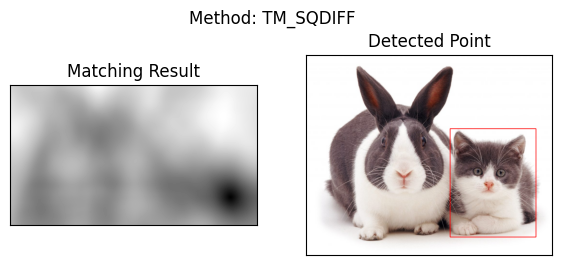

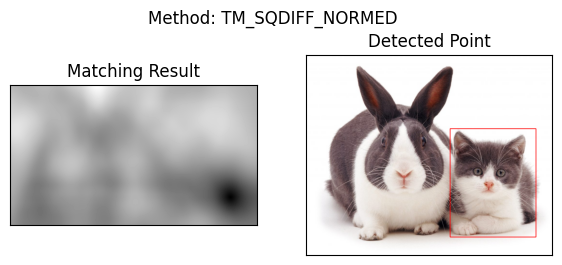

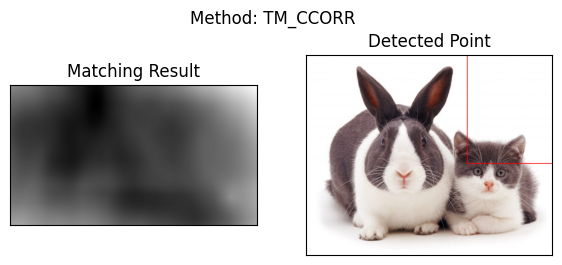

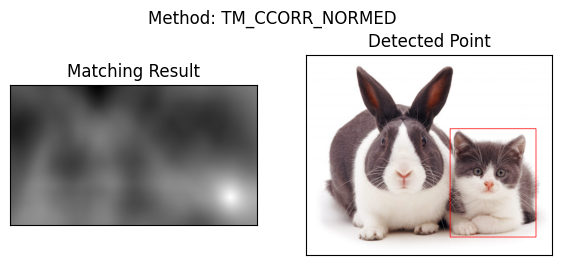

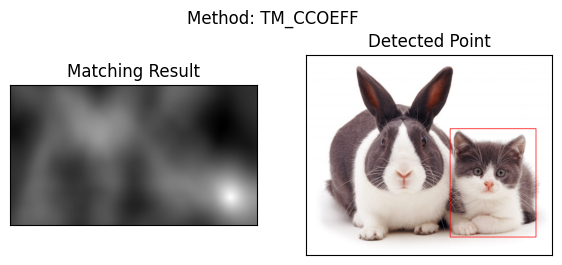

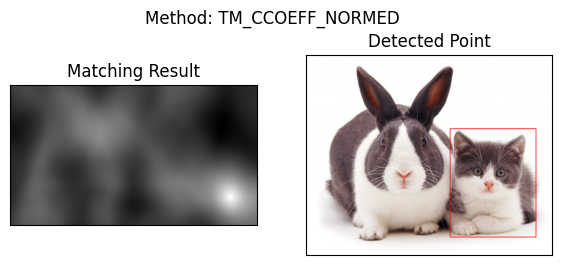

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image and template
img = cv2.imread('/content/drive/MyDrive/pcvk/minggu11/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/pcvk/minggu11/cat2_templatejpg.jpg')

# Convert images to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Ensure the template is not empty
if template is None:
    print("Template not found. Make sure the 'cat2_templatejpg.jpg' file is in the same directory.")
else:
    # Template size
    w, h = template_gray.shape[::-1]

    # List of template matching methods
    methods = [
        ('TM_SQDIFF', cv2.TM_SQDIFF),
        ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
        ('TM_CCORR', cv2.TM_CCORR),
        ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
        ('TM_CCOEFF', cv2.TM_CCOEFF),
        ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED)
    ]

    # Loop through all methods
    for method_name, method in methods:
        img_copy = img.copy()

        # Apply template matching
        res = cv2.matchTemplate(img_gray, template_gray, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take the minimum value
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Draw a rectangle around the matched area with red color
        cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

        # Display the results
        plt.figure(figsize=(7, 3))

        plt.subplot(121)
        plt.imshow(res, cmap='gray')
        plt.title('Matching Result')
        plt.xticks([]), plt.yticks([])

        plt.subplot(122)
        plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
        plt.title('Detected Point')
        plt.xticks([]), plt.yticks([])

        plt.suptitle(f"Method: {method_name}")
        plt.show()


### Soal No. 3
Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

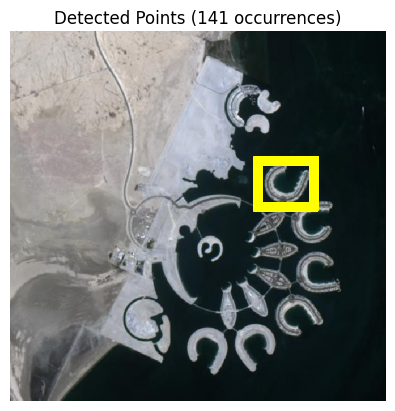

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def template_matching(img, template, threshold=1000000, overlap_threshold=0.5):
    img = np.array(img)
    template = np.array(template)

    img_height, img_width = img.shape[:2]
    template_height, template_width = template.shape[:2]

    # Create an empty result image
    result = np.zeros((img_height - template_height + 1, img_width - template_width + 1))

    # Perform template matching
    for y in range(result.shape[0]):
        for x in range(result.shape[1]):
            # Calculate the sum of squared differences (SSD) for the template at this position
            ssd = np.sum((img[y:y+template_height, x:x+template_width] - template) ** 2)
            result[y, x] = ssd

    # Find locations where the SSD is below the threshold
    match_locations = np.where(result < threshold)

    # Non-maximum suppression to filter out overlapping detections
    filtered_locations = non_max_suppression(match_locations, result, overlap_threshold)

    return filtered_locations

def non_max_suppression(locations, result, overlap_threshold):
    # Get the indices of locations sorted by confidence score in descending order
    sorted_indices = np.argsort(result[locations], kind='mergesort')[::-1]
    sorted_locations = (locations[0][sorted_indices], locations[1][sorted_indices])

    # Initialize an array to keep track of selected locations
    selected = np.zeros_like(result, dtype=bool)

    for i in range(len(sorted_indices)):
        y, x = sorted_locations[0][i], sorted_locations[1][i]

        # Check if the location is not selected and not in the proximity of a selected location
        if not selected[y, x]:
            selected[y - 5:y + 5, x - 5:x + 5] = True

            # Filter out overlapping detections
            overlap = (result[y, x] / result[locations]) > overlap_threshold
            selected[locations[0][overlap], locations[1][overlap]] = False

    return np.where(selected)

# Load the input image and template
img_path = '/content/drive/MyDrive/pcvk/minggu11/bahrain.jpg'
template_path = '/content/drive/MyDrive/pcvk/minggu11/bahrain-template.jpg'

img = np.array(Image.open(img_path))
template = np.array(Image.open(template_path))

# Perform template matching
matched_locations = template_matching(img, template, threshold=1000000, overlap_threshold=0.5)

# Draw rectangles around the matched areas in yellow
img_with_rectangles = img.copy()
template_height, template_width = template.shape[:2]
for loc in zip(matched_locations[0], matched_locations[1]):
    rectangle = plt.Rectangle((loc[1], loc[0]), template_width, template_height, color='yellow', fill=False, linewidth=2)
    plt.gca().add_patch(rectangle)

# Display the original image with rectangles
plt.imshow(img_with_rectangles)
plt.title(f'Detected Points ({len(matched_locations[0])} occurrences)')
plt.axis('off')

plt.show()


### Soal No. 4
Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

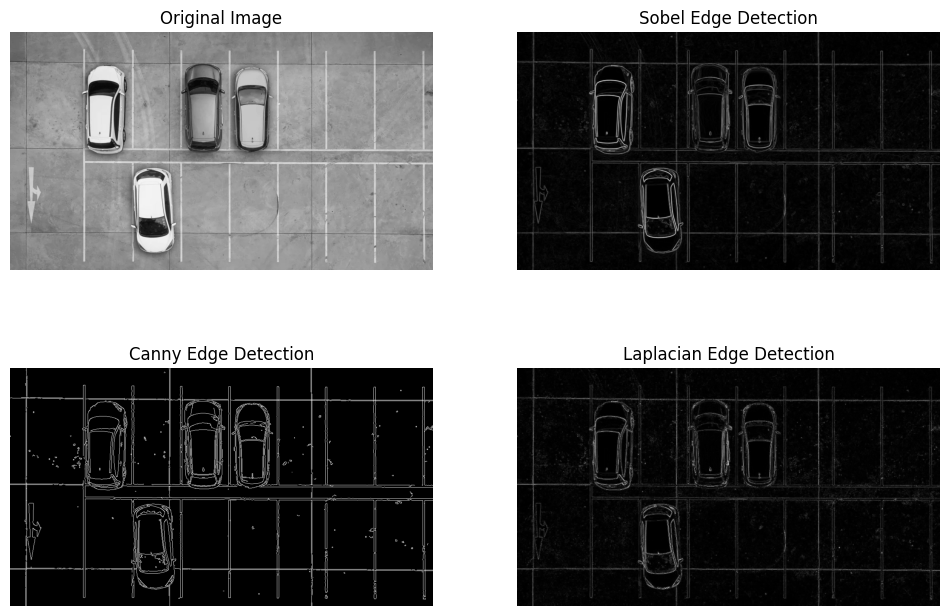

In [40]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
img_path = '/content/drive/MyDrive/pcvk/minggu11/car-park.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny_edges = cv2.Canny(img, 100, 200)

# Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(img, cv2.CV_64F)

# Enhance Laplacian visualization
laplacian_edges_vis = cv2.convertScaleAbs(laplacian_edges)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges_vis, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

### Soal No. 5
Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

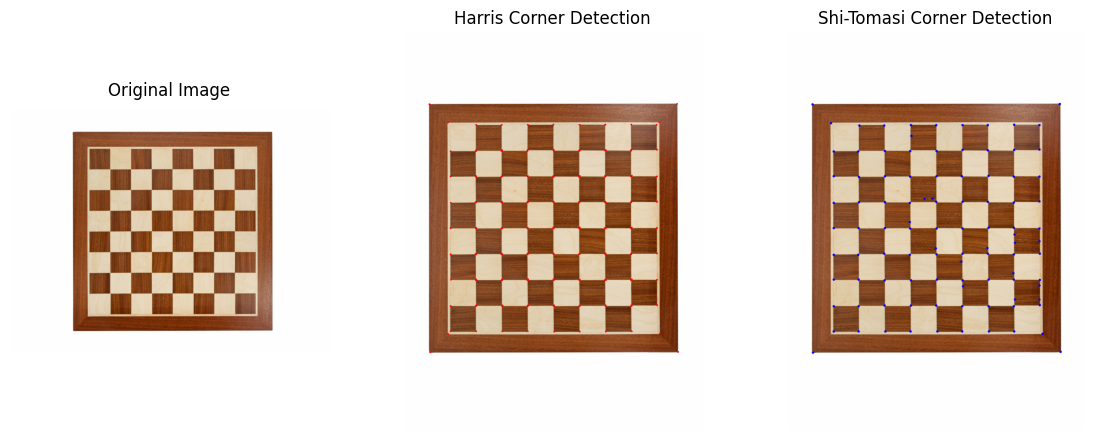

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img_path = '/content/drive/MyDrive/pcvk/minggu11/chess-board.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Draw Harris Corners on the image
img_harris = img.copy()
img_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Draw Shi-Tomasi Corners on the image
img_shi_tomasi = img.copy()
shi_tomasi_corners = np.int0(shi_tomasi_corners)
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(img_shi_tomasi, (x, y), 3, 255, -1)

# Rotate the images for vertical display
img_harris = cv2.rotate(img_harris, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_shi_tomasi = cv2.rotate(img_shi_tomasi, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Display the results
plt.figure(figsize=(14, 8))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.show()

### Soal No. 6
Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

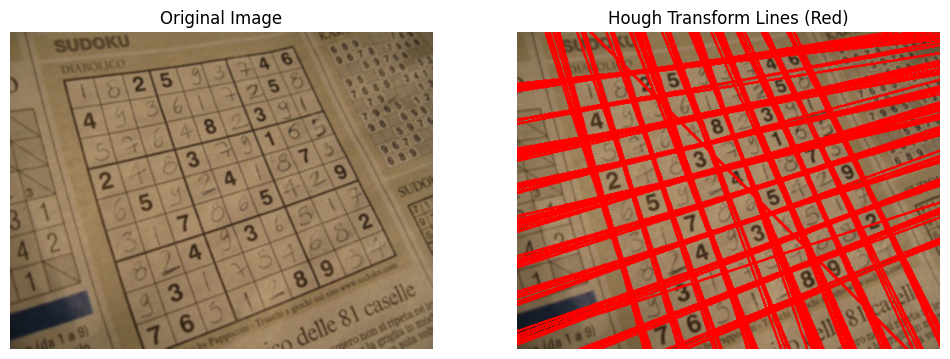

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img_path = '/content/drive/MyDrive/pcvk/minggu11/sudoku.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Perform Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

# Draw lines on the original image with red color
img_lines = img.copy()
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = int(a * rho)
    y0 = int(b * rho)
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw lines with red color

# Display the original image and the image with Hough Transform lines
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform Lines (Red)')
plt.axis('off')

plt.show()


### Soal No. 7
Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

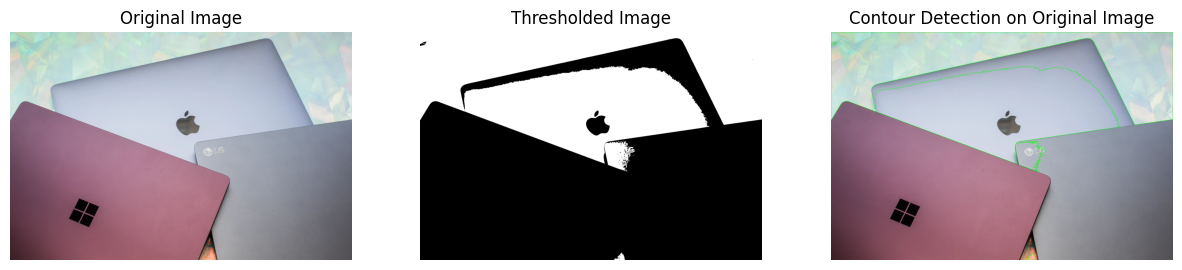

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img_path = '/content/drive/MyDrive/pcvk/minggu11/laptop.jpg'
img = cv2.imread(img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary thresholding
_, thresholded = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
img_with_contours = img.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)  # Draw contours in green color

# Display the results
plt.figure(figsize=(15, 8))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection on Original Image')
plt.axis('off')

plt.show()
